### 决策树
- 决策树：是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，每个叶节点代表一种类别。
- 决策树的构造：通常采用递归的方法将数据集划分为较小的子集。
- 决策树的剪枝：决策树生成后，容易出现过拟合现象，需要对决策树进行剪枝。
- 从根节点，一步步向下，直到叶节点，就是决策树的分类过程。
- 所有的数据都会落到叶子节点，既可以做分类，也可以做回归。


树的构成：
- 根节点：第一个选择点，包含数据集中所有数据的集合。
- 非叶子节点与分支：中间节点，包含数据集中的一部分数据的集合。
- 叶子节点：最终的分类结果。

决策树的训练与测试
- 训练：根据训练数据集生成决策树。（从根节点开始选择特征，如何进行特征切分
- 测试：根据训练好的决策树对测试数据集进行分类。
- 构建好决策树之后测试比较简单。

如何切分特征
- 问题：根节点的选择，如何选择最优的特征进行切分。
- 目标：通过一种衡量标准，找到最优的特征进行切分。决定根节点。

衡量标准-信息熵
- 信息熵：表示随机变量不确定性的度量。(物体内部的混乱程度)
- 信息增益：表示得知特征X的信息而使得类Y的信息的不确定性减少的程度。
- 信息增益越大，说明使用特征X划分数据集D的效果越好。
- 公式：
    - 信息熵：$H(D) = -\sum_{i=1}^{n}p_i\log_{2}p_i$

决策树算法:ID3,C4.5,CART     
cart是用gini系数来划分数据集的，gini系数是基尼不纯度，是指从数据集中随机选取子项，度量其被错误分类到其他分组里的概率。    
GINI:  $Gini(p) = 1 - \sum_{i=1}^{n}p_i^2$

连续值:
- 连续值的处理：对于连续值的处理，可以先对数据进行排序，然后遍历所有可能的划分点，找到最优的划分点。(切分, 离散化)

决策树剪枝:
- 剪枝：决策树生成后，容易出现过拟合现象，需要对决策树进行剪枝。
- 预剪枝：在决策树生成过程中，对每个节点在划分前先进行估计，若当前节点的划分不能带来决策树泛化性能提升，则停止划分。
    - 深度,叶子节点个数,信息增益,样本个数.
- 后剪枝：先生成决策树，然后自底向上对非叶子节点进行考察，若将该节点对应的子树替换为叶子节点能带来决策树泛化性能提升，则将该子树替换为叶子节点。
    - 一定衡量标准: $C_{\alpha}(T) = C(T) + \alpha|T|$

- 分类:叶子节点的类别是由多数表决决定的。取众数
- 回归:叶子节点的类别是由均值决定的。取均值

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file='iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )



In [5]:
import graphviz
with open("E:\Project\Learning\决策树\iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
# dot.format
dot.render(filename='iris_tree', format='png', cleanup=True)


'iris_tree.png'

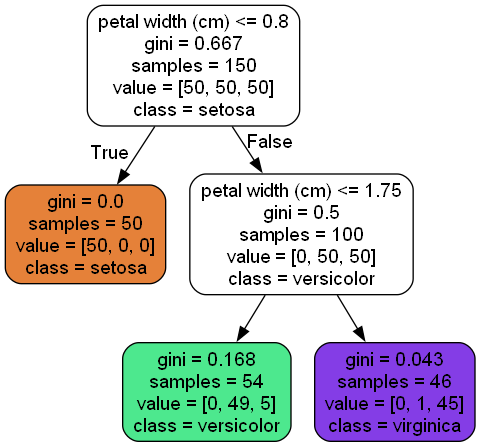

In [6]:
from IPython.display import Image
Image('iris_tree.png')

# 决策树的决策边界

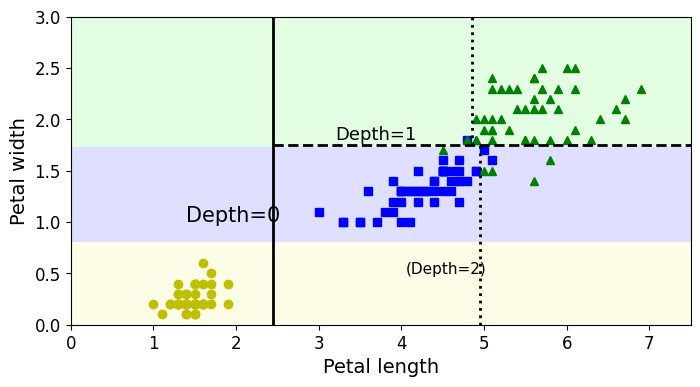

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=(0, 7.5, 0, 3), iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## 概率估计   
如果输入一个花瓣长5cm，宽1.5cm的花朵，决策树会输出以下概率：
- iris-setosa: 0% (0/54)
- iris-versicolor: 90.7% (49/54)
- iris-virginica: 9.3% (5/54)

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### 决策树里的正则化   
DecisionTreeClassifier类有一些正则化超参数来限制树的形状。   
- min_samples_split: 节点在分裂之前必须具有的最小样本数。
- min_samples_leaf: 叶节点必须具有的最小样本数。
- min_weight_fraction_leaf: 与min_samples_leaf相同，但表示为加权实例总数的一部分。(少用)
- max_leaf_nodes: 最大叶节点数。
- max_features: 在每个节点分裂时评估的最大特征数。(除非特别大,否则都会尝试所有特征)
- max_depth: 最大深度。

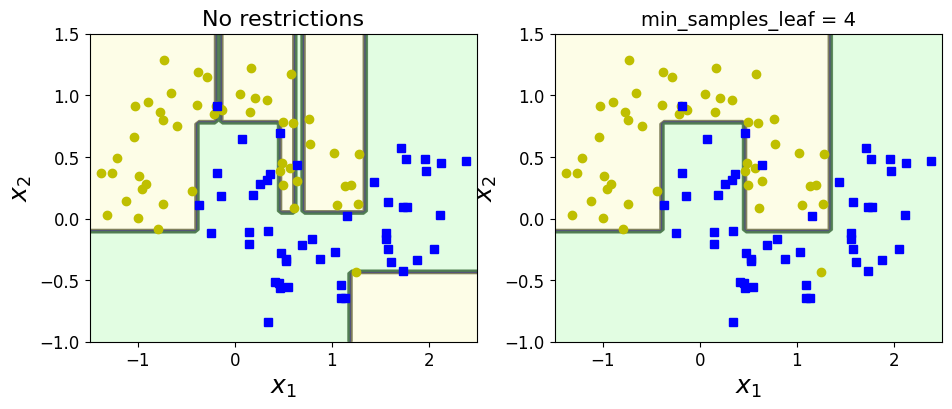

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## 对数据敏感

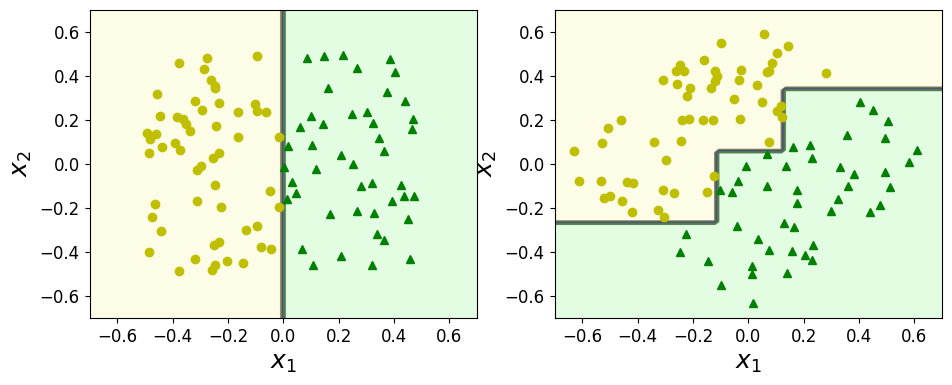

In [10]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

### 回归任务

In [11]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10


In [12]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [14]:
export_graphviz(
        tree_reg,
        out_file=os.path.join('E:\Project\Learning\决策树', "iris_tree_reg1.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [15]:
import graphviz
with open("E:\Project\Learning\决策树\iris_tree_reg1.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)

dot.render(filename='iris_tree_reg1', format='png', cleanup=True)


'iris_tree_reg1.png'

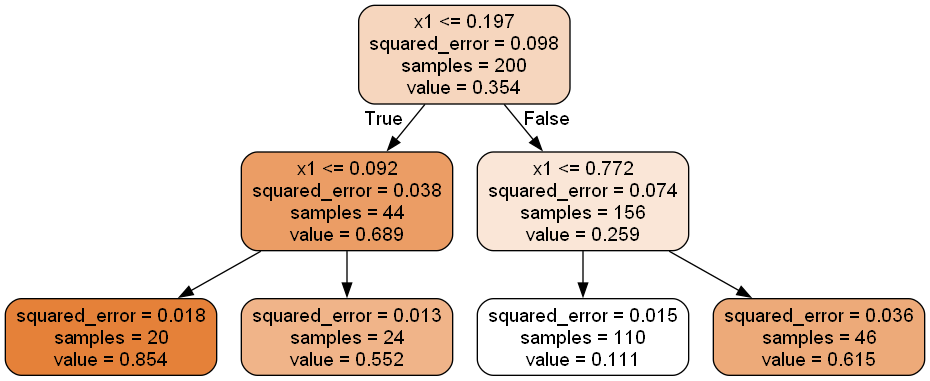

In [16]:
from IPython.display import Image
Image('iris_tree_reg1.png')


# 对比不同深度的决策树

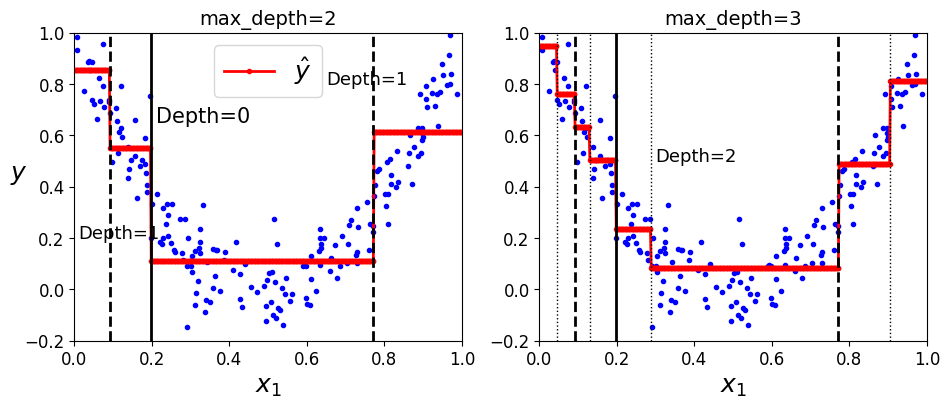

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
plt.figure(figsize=(11, 4))
plt.subplot(121)

plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()


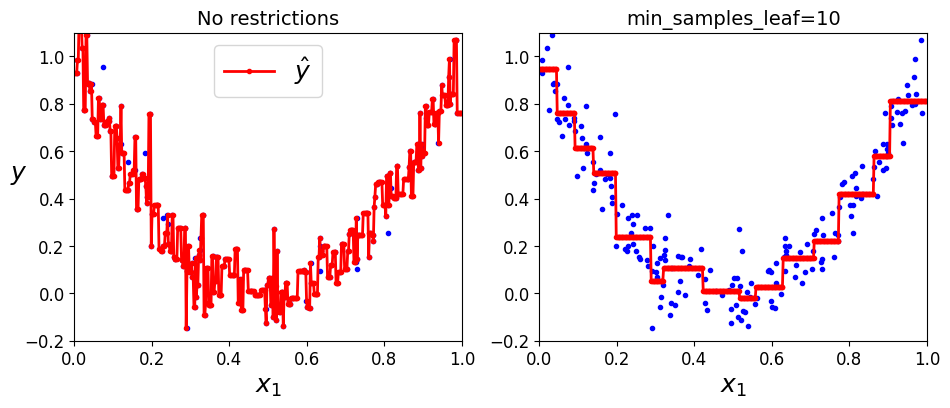

In [18]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()